In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
insurance= pd.read_csv('/content/new_insurance_data.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [4]:
insurance.shape

(1338, 13)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
insurance.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [7]:
len(insurance)

1338

In [8]:
insurance.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


In [9]:
for ifc in insurance.select_dtypes(include='float64').columns:
    if(insurance[ifc].skew()>0.5):
       print(ifc,'skewed')
       insurance[ifc]=insurance[ifc].fillna(insurance[ifc].median())
    else:
        print(ifc,'Normal')
        insurance[ifc]=insurance[ifc].fillna(insurance[ifc].mean())

age Normal
bmi Normal
children skewed
Claim_Amount Normal
past_consultations Normal
num_of_steps Normal
Hospital_expenditure skewed
NUmber_of_past_hospitalizations Normal
Anual_Salary skewed
charges skewed


age


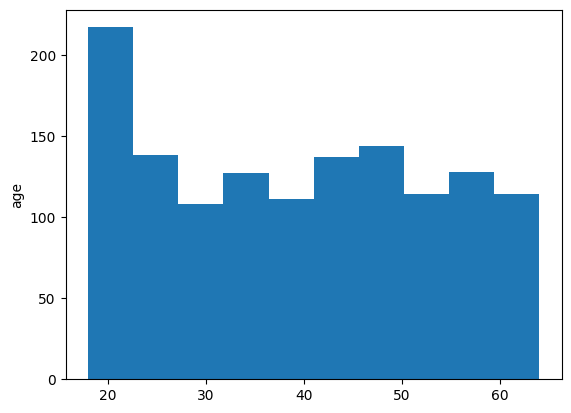

bmi


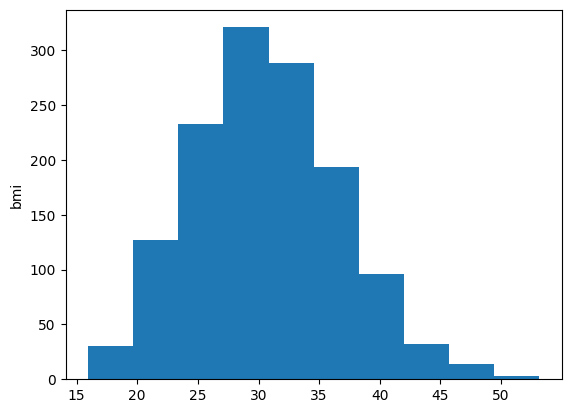

children


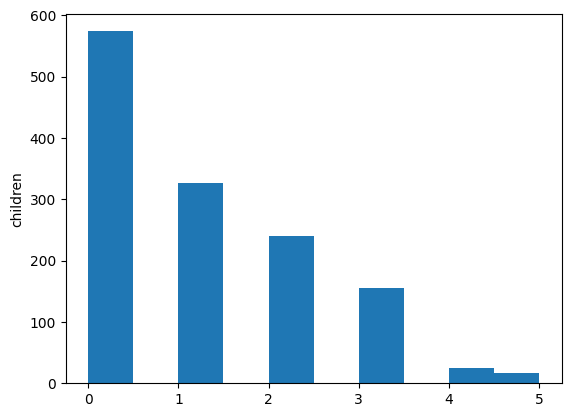

Claim_Amount


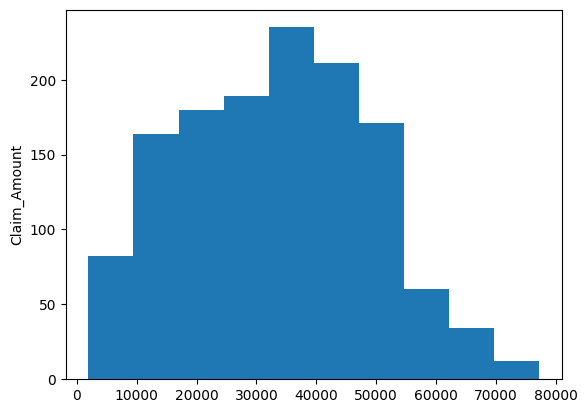

past_consultations


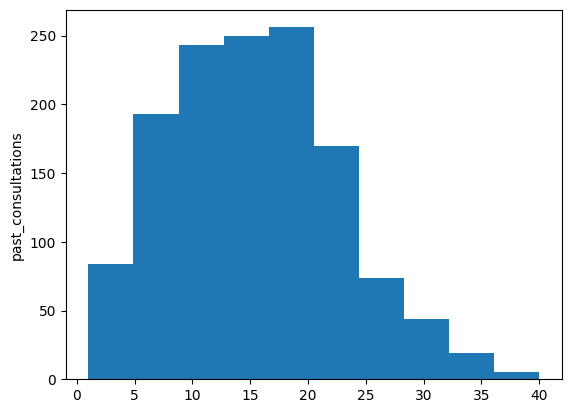

num_of_steps


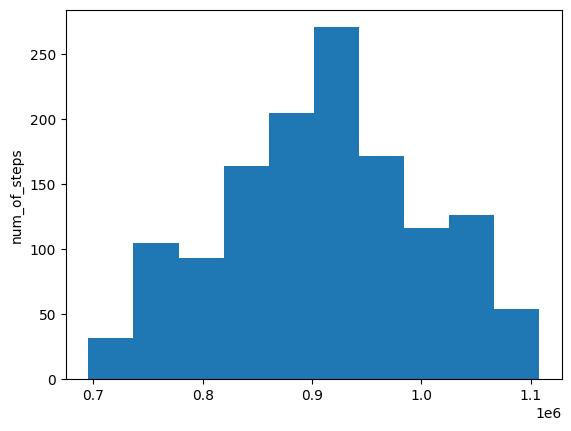

Hospital_expenditure


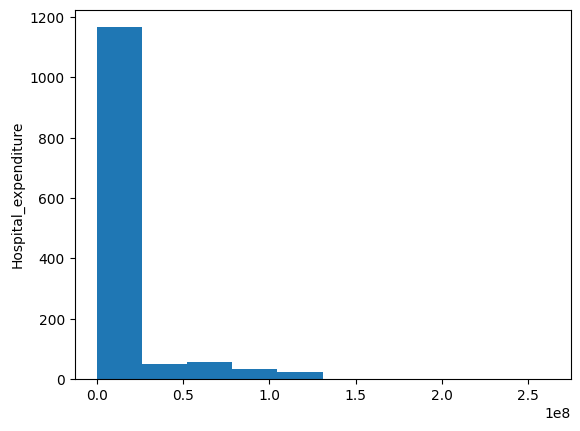

NUmber_of_past_hospitalizations


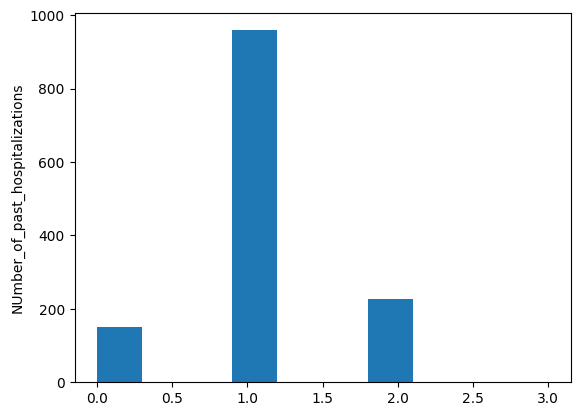

Anual_Salary


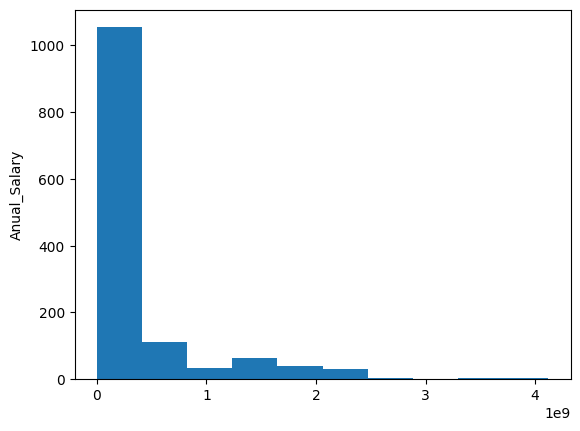

charges


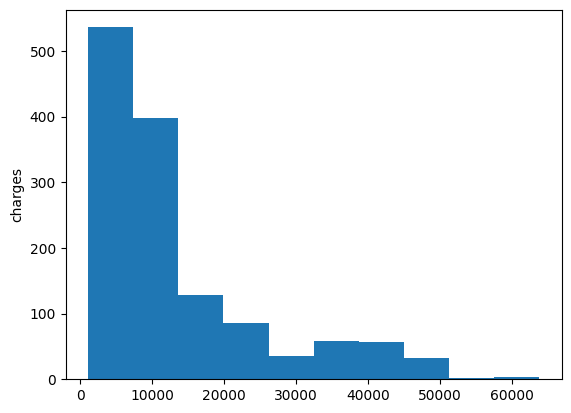

In [10]:
for i  in insurance.select_dtypes(include="float64").columns:
    plt.hist(insurance[i])
    print(i)
    plt.ylabel(i)
    plt.show()

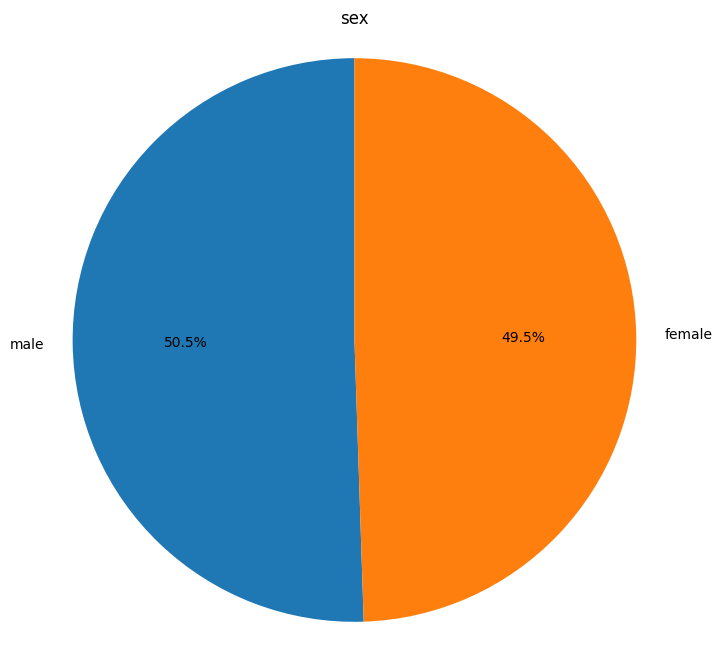

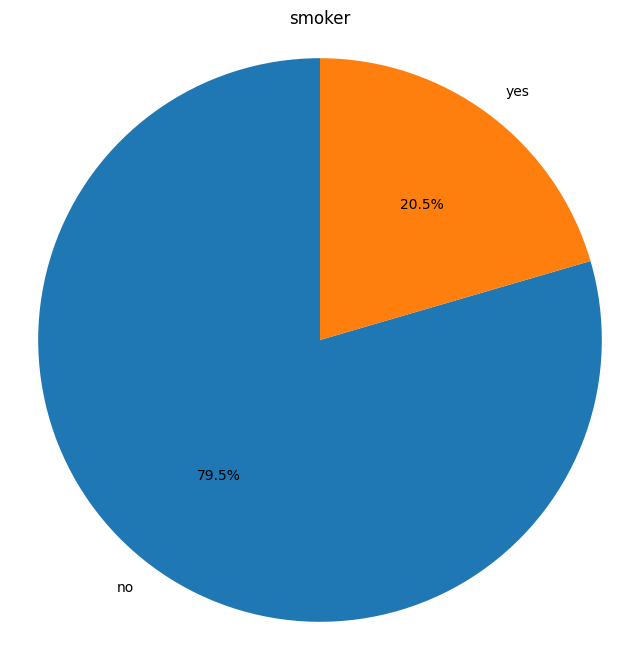

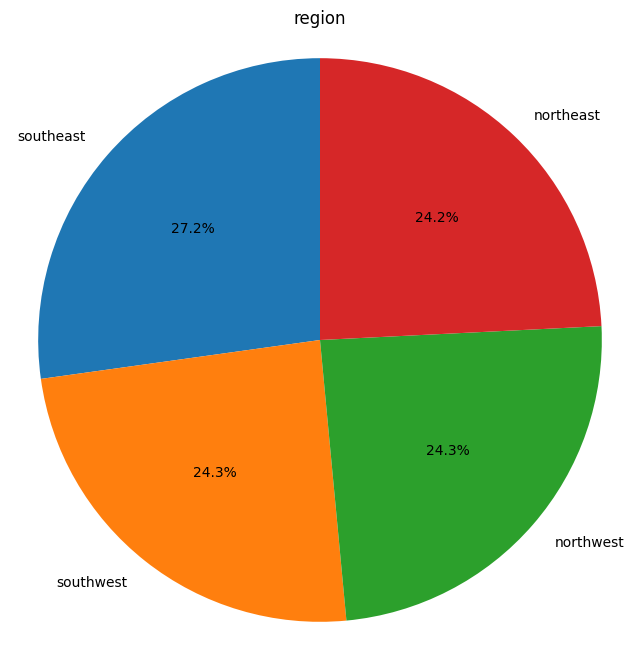

In [11]:
for i in insurance.select_dtypes(include='object_'):
    plt.figure(figsize=(8,8))
    cnt=insurance[i].value_counts()
    plt.title(i)
    plt.pie(cnt, labels=cnt.index, autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.show()

In [12]:
y=insurance.iloc[:,-1]
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


age


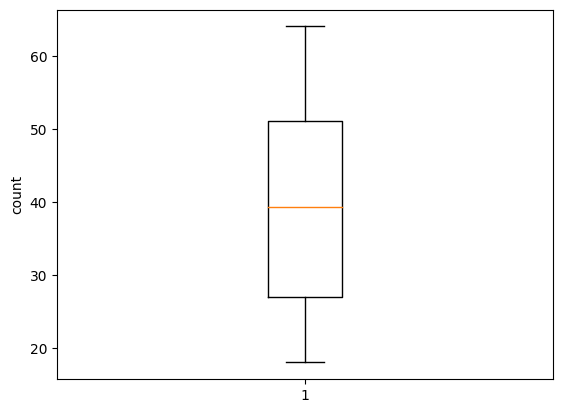

bmi


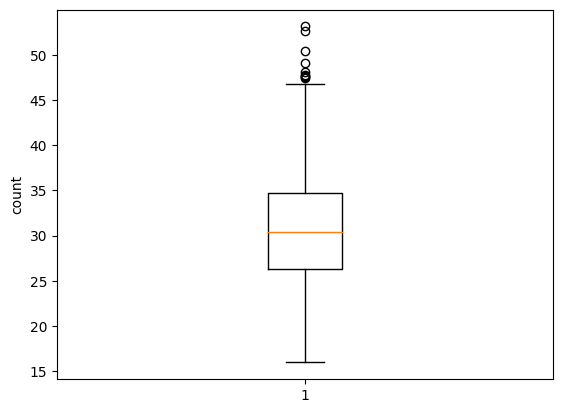

children


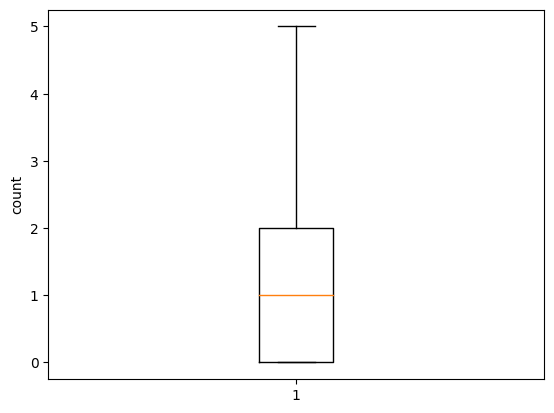

Claim_Amount


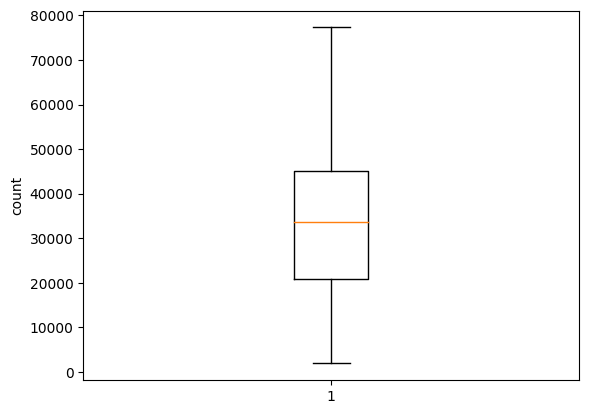

past_consultations


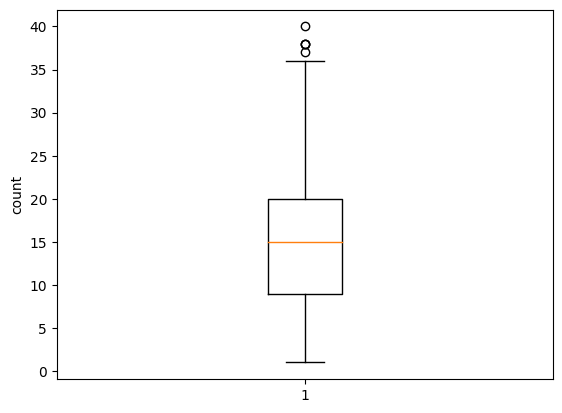

num_of_steps


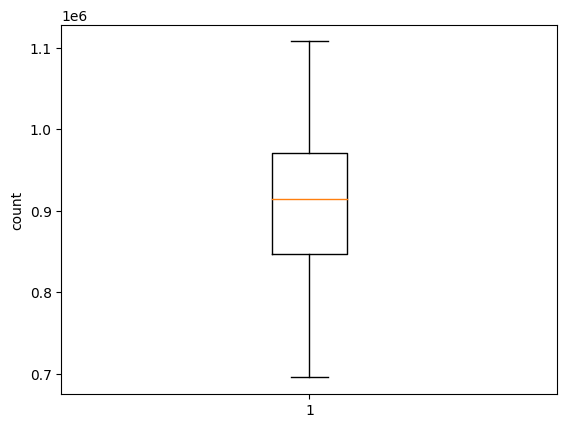

Hospital_expenditure


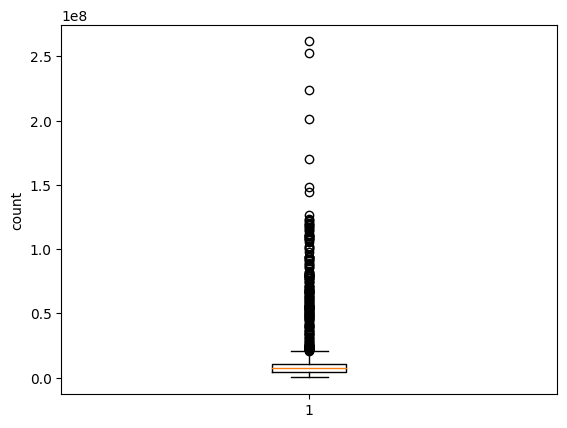

NUmber_of_past_hospitalizations


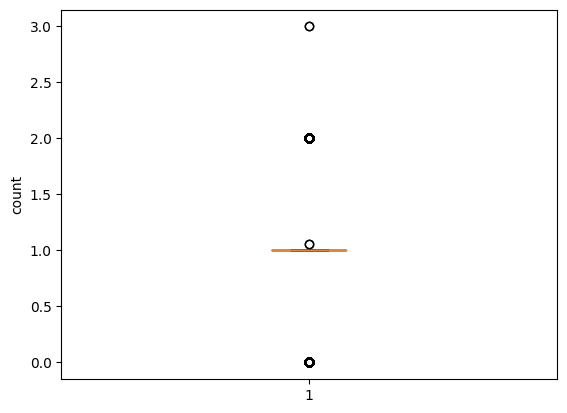

Anual_Salary


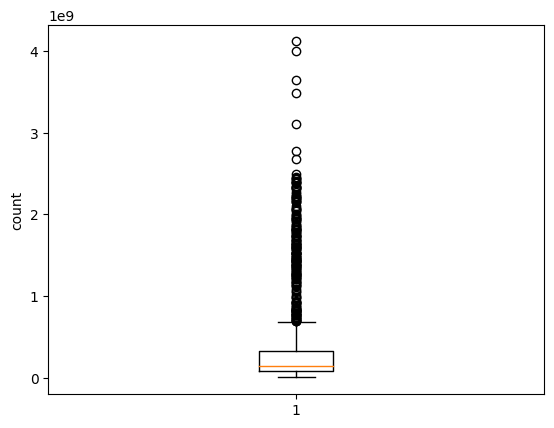

charges


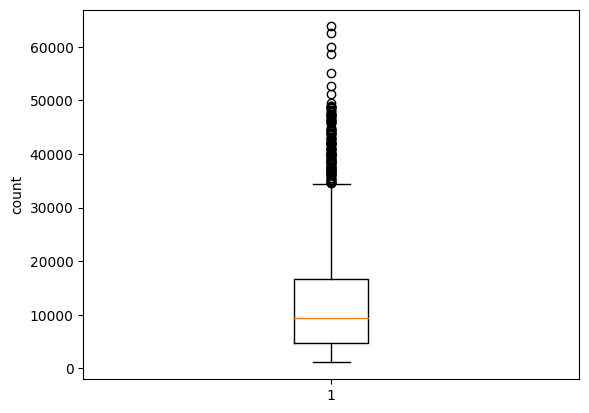

In [13]:
for i in insurance.select_dtypes(include='float64').columns:
    plt.boxplot(insurance[i])
    print(i)
    plt.ylabel('count')
    plt.show()

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')


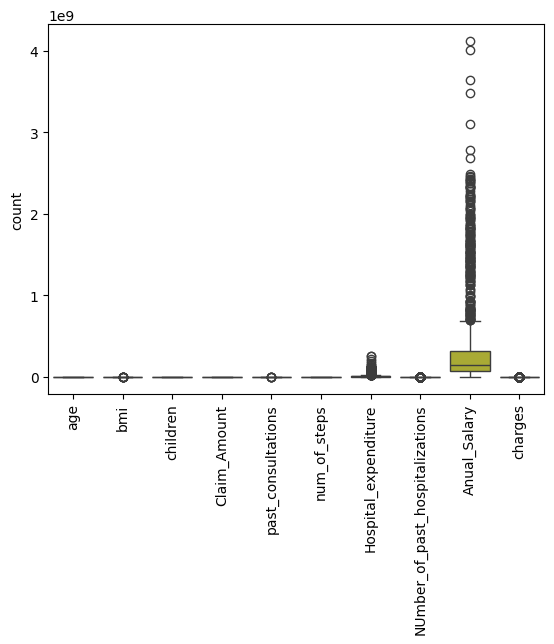

In [14]:
import seaborn as sns
ddd=insurance.select_dtypes(include=['float64']).columns
print(ddd)
sns.boxplot(insurance[ddd])
plt.xticks(rotation='vertical')
plt.ylabel('count')
plt.show()

In [15]:
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
insurance_filtered = insurance.copy()

for i in outlier_list:
    Q1=insurance_filtered[i].quantile(0.25)
    Q3=insurance_filtered[i].quantile(0.75)
    IQR=Q3-Q1

    insurance_filtered=insurance_filtered[(insurance_filtered[i]>Q1-1.5*IQR)&(insurance_filtered[i]<Q3+1.5*IQR)]

In [16]:
#earlier (1338,13)
insurance.shape

(1338, 13)

In [17]:
insurance.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1333,False
1334,False
1335,False
1336,False


In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

var_inflation=[]
for i in insurance.columns:
    if((insurance[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=insurance[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,11.964654
1,bmi,25.997490
2,children,1.947676
3,Claim_Amount,6.915357
4,past_consultations,8.334355
5,num_of_steps,60.099529
6,Hospital_expenditure,17.696072
7,NUmber_of_past_hospitalizations,15.879141
8,Anual_Salary,23.620761


In [19]:
insurance=insurance.drop(['num_of_steps'],axis=1)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

var_inflation=[]
for i in insurance.columns:
    if((insurance[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=insurance[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,10.150737
1,bmi,11.689672
2,children,1.931458
3,Claim_Amount,6.372826
4,past_consultations,7.537785
5,Hospital_expenditure,17.570374
6,NUmber_of_past_hospitalizations,13.759175
7,Anual_Salary,23.594703


In [21]:
insurance=insurance.drop(['Anual_Salary'],axis=1)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

var_inflation=[]
for i in insurance.columns:
    if((insurance[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=insurance[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,9.908413
1,bmi,11.146569
2,children,1.917704
3,Claim_Amount,6.360348
4,past_consultations,7.339203
5,Hospital_expenditure,2.547762
6,NUmber_of_past_hospitalizations,11.054509


In [23]:
insurance=insurance.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

var_inflation=[]
for i in insurance.columns:
    if((insurance[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=insurance[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,8.377422
1,bmi,11.127027
2,children,1.815189
3,Claim_Amount,6.088669
4,past_consultations,6.963084
5,Hospital_expenditure,1.907037


In [25]:
x

,age,bmi,children,Claim_Amount,past_consultations,Hospital_expenditure
0,18.0,23.210,0.0,29087.54313,17.0,4.720921e+06
1,18.0,30.140,0.0,39053.67437,7.0,4.329832e+06
2,18.0,33.330,0.0,39023.62759,19.0,6.884861e+06
3,18.0,33.660,0.0,28185.39332,11.0,4.274774e+06
4,18.0,34.100,0.0,14697.85941,16.0,3.787294e+06
...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1.703805e+08
1334,31.0,38.095,1.0,43419.95227,31.0,2.015152e+08
1335,52.0,34.485,3.0,52458.92353,25.0,2.236450e+08
1336,45.0,30.360,0.0,69927.51664,34.0,2.528924e+08


In [26]:
y=insurance.iloc[:,-1]
y

,charges
0,1121.87390
1,1131.50660
2,1135.94070
3,1136.39940
4,1137.01100
...,...
1333,55135.40209
1334,58571.07448
1335,60021.39897
1336,62592.87309


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
x

,age,bmi,children,Claim_Amount,past_consultations,Hospital_expenditure
0,18.0,23.210,0.0,29087.54313,17.0,4.720921e+06
1,18.0,30.140,0.0,39053.67437,7.0,4.329832e+06
2,18.0,33.330,0.0,39023.62759,19.0,6.884861e+06
3,18.0,33.660,0.0,28185.39332,11.0,4.274774e+06
4,18.0,34.100,0.0,14697.85941,16.0,3.787294e+06
...,...,...,...,...,...,...
1333,33.0,35.530,0.0,63142.25346,32.0,1.703805e+08
1334,31.0,38.095,1.0,43419.95227,31.0,2.015152e+08
1335,52.0,34.485,3.0,52458.92353,25.0,2.236450e+08
1336,45.0,30.360,0.0,69927.51664,34.0,2.528924e+08


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)
x_train

,age,bmi,children,Claim_Amount,past_consultations,Hospital_expenditure
560,45.0,35.815,0.0,29622.26103,6.0,7.579867e+06
1285,44.0,38.950,0.0,66824.70947,23.0,8.042196e+07
1142,50.0,27.360,0.0,36320.75384,16.0,1.772151e+07
969,63.0,21.660,0.0,24827.43078,8.0,1.214312e+07
486,34.0,19.000,3.0,47348.03370,10.0,6.034962e+06
...,...,...,...,...,...,...
1095,59.0,37.400,0.0,47554.34106,19.0,1.132722e+07
1130,46.0,27.600,0.0,63672.07916,14.0,2.295519e+07
1294,54.0,34.210,2.0,42578.49702,24.0,9.188836e+07
860,58.0,36.480,0.0,27369.02461,22.0,3.634140e+06


In [30]:
insurance.shape

(1338, 10)

In [31]:
x_test

,age,bmi,children,Claim_Amount,past_consultations,Hospital_expenditure
764,54.0,31.900,1.0,41178.474530,24.0,6.906061e+06
887,60.0,38.060,0.0,55587.429360,14.0,1.062849e+07
890,44.0,36.480,0.0,8819.797107,9.0,6.113974e+06
1293,47.0,38.940,2.0,46520.247900,23.0,9.420315e+07
259,22.0,34.580,2.0,48614.570180,11.0,8.850428e+06
...,...,...,...,...,...,...
109,22.0,27.100,0.0,33257.707940,20.0,4.589846e+06
575,47.0,32.300,1.0,42904.689350,6.0,5.825061e+06
535,41.0,37.100,2.0,51973.371980,14.0,8.454802e+06
543,45.0,39.805,0.0,9922.222111,8.0,5.802739e+06


In [32]:
x_train

,age,bmi,children,Claim_Amount,past_consultations,Hospital_expenditure
560,45.0,35.815,0.0,29622.26103,6.0,7.579867e+06
1285,44.0,38.950,0.0,66824.70947,23.0,8.042196e+07
1142,50.0,27.360,0.0,36320.75384,16.0,1.772151e+07
969,63.0,21.660,0.0,24827.43078,8.0,1.214312e+07
486,34.0,19.000,3.0,47348.03370,10.0,6.034962e+06
...,...,...,...,...,...,...
1095,59.0,37.400,0.0,47554.34106,19.0,1.132722e+07
1130,46.0,27.600,0.0,63672.07916,14.0,2.295519e+07
1294,54.0,34.210,2.0,42578.49702,24.0,9.188836e+07
860,58.0,36.480,0.0,27369.02461,22.0,3.634140e+06


In [33]:
x_test

,age,bmi,children,Claim_Amount,past_consultations,Hospital_expenditure
764,54.0,31.900,1.0,41178.474530,24.0,6.906061e+06
887,60.0,38.060,0.0,55587.429360,14.0,1.062849e+07
890,44.0,36.480,0.0,8819.797107,9.0,6.113974e+06
1293,47.0,38.940,2.0,46520.247900,23.0,9.420315e+07
259,22.0,34.580,2.0,48614.570180,11.0,8.850428e+06
...,...,...,...,...,...,...
109,22.0,27.100,0.0,33257.707940,20.0,4.589846e+06
575,47.0,32.300,1.0,42904.689350,6.0,5.825061e+06
535,41.0,37.100,2.0,51973.371980,14.0,8.454802e+06
543,45.0,39.805,0.0,9922.222111,8.0,5.802739e+06


In [34]:
y_train

,charges
560,7731.85785
1285,42983.45850
1142,25656.57526
969,14449.85440
486,6753.03800
...,...
1095,21797.00040
1130,24603.04837
1294,44260.74990
860,12235.83920


In [35]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [36]:
prediction=l_model.predict(x_test)

In [37]:
prediction

array([1.59193639e+04, 1.48902958e+04, 5.72364212e+03, 4.27621354e+04,
       8.87793369e+03, 5.55498185e+04, 1.44463431e+04, 1.04802679e+04,
       3.65763115e+04, 1.23285742e+04, 7.07525692e+03, 1.09764477e+04,
       2.08332578e+03, 8.14984067e+03, 8.90204002e+03, 1.20298025e+04,
       9.60314597e+03, 1.66249853e+04, 9.22014587e+03, 1.33379965e+04,
       1.03219259e+04, 1.07658223e+04, 1.25468791e+04, 5.80643524e+03,
       1.66453394e+04, 5.90626103e+03, 9.95313481e+03, 6.64664903e+03,
       8.87009680e+03, 1.23123736e+04, 3.66703153e+04, 1.65050137e+04,
       6.54450025e+03, 2.03611120e+04, 1.85274200e+04, 1.19882011e+04,
       1.20811663e+04, 3.06588639e+04, 2.73331929e+04, 9.14049387e+03,
       5.76111862e+03, 7.59111358e+03, 1.30339057e+04, 9.28089101e+03,
       1.32657208e+04, 8.38551628e+03, 4.11588740e+03, 8.19985706e+03,
       3.01586412e+03, 4.07747237e+03, 9.78349849e+03, 8.66201467e+03,
       1.39695984e+04, 4.36577123e+04, 2.61503079e+04, 9.96176769e+03,
      

In [38]:
from sklearn.metrics import *
r2score=r2_score(y_test,prediction)
r2score

0.8541157625212898

In [39]:
a=l_model.predict([[2,47489,19,378498,3883930,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
